# Deep Learning

Come avrete notato, se vogliamo scrivere un software per risolvere un qualche problerma applicativo dobbiamo individuare le giuste strutture dati e l'algoritmo che risolve il nostro problema.
L'algoritmo deve essere descritto fin nei minimi dettagli con il linguaggio di programmazione scelto.
Tutto ciò è molto bello :).
Ma, c'è un altro modo per affrontare un problema applicativo senza dover progettare e realizzare la soluzione con così tanti dettagli implementativi?
Gli scienziati si sono interrogati nello stesso modo fin dagli anni '50 del secolo scorso e le soluzioni alla quali sono giunti sono essenzialmente due:

- Linguaggi ad alto livello o meta linguaggi per la descrizione di problemi applicativi "eseguibili" dai computer;
- Tecniche di Deep Learning.

Della prima soluzione non ci occupiamo.
La seconda soluzione è una delle tecniche di interesse per questo corso.
Tali tecniche si basano sull'uso di reti anche molto complesse di semplici unità di elaborazione delle informazioni che mimano in qualhe modo il comportamento delle neuronali biologiche.
Tali reti artificiali prendono il nome di Reti Neurali (Neural Network).
Perché una Rete Neurale sia capace di risolvere un qualche tipo di problema applicativo essa deve essere "addestrata".
Ad esempio, una rete che classifica delle immagini a seconda che esse contengano un cavallo o un elefante deve essere addestrata con un certo numero di immagini già catalogate come cavallo o elefante (training set).

## Creiamo l'insieme di addestramento

L'insieme di addestramento deve essere rappresentativo dei possibili casi che si potrebbero presentare alla nostra intelligenza artificiale e sufficientemente numeroso.


Con Python si possono realizzare utili procedure che prendono dati da siti web di interesse.
In particolare, nel caso delle immagini ci sono diverse librerie che possono aiutarci per fare ricerche online di immagini che usano i servizi di motori di ricerca.
Ad esempio, [jmd_imagescraper](https://github.com/joedockrill/jmd_imagescraper) è una libreria che usa i servizi di del motore di ricerca [DuckDuckGo](https://duckduckgo.com/) per ricercare e scaricare immagini.

In [1]:
# come al solito se non avete installato la libreria jmd_imagescraper Python si arrabbierà. Per calmarlo è sufficiente "scommentare" e eseguire la prossima riga
#!pip install -q jmd_imagescraper
from jmd_imagescraper.core import * 
from pathlib import Path
from jmd_imagescraper.imagecleaner import *
# from PIL import Image

Proviamo a cercare 100 immagini di cavalli e 100 di elefanti usando la traduzione in lingua Inglese per avere risultati più numerosi.
Come potete facilmente capire, 50 immagini da cercare e scaricare sono un bel lavoretto da fare a mano.
Per fortuna ci sono le librerie di Python ...

In [2]:
animals=['horse','elephant']
path = Path().cwd()/"animals"# crea la cartella animals nella cartella corrente e sposta li la cartella corrente
duckduckgo_search(path,"horse","horses",max_results=100) # cerca e scarica 100 immagini di cavalli e li salva in path/horse
duckduckgo_search(path,"elephant","elephants",max_results=100) # cerca e scarica 100 immagini di elefanti e li salva in path/elephant


Duckduckgo search: horses


Duckduckgo search: elephants


[WindowsPath('c:/Users/lcapitanio/Google Drive/Didattica/LUISS/LABGP3 - INTELLIGENZA ARTIFICIALE - ARTIFICIAL INTELLIGENCE/5 apprendimento/rete neurale/animals/elephant/001_7c72a775.jpg'),
 WindowsPath('c:/Users/lcapitanio/Google Drive/Didattica/LUISS/LABGP3 - INTELLIGENZA ARTIFICIALE - ARTIFICIAL INTELLIGENCE/5 apprendimento/rete neurale/animals/elephant/002_a0ccd39a.jpg'),
 WindowsPath('c:/Users/lcapitanio/Google Drive/Didattica/LUISS/LABGP3 - INTELLIGENZA ARTIFICIALE - ARTIFICIAL INTELLIGENCE/5 apprendimento/rete neurale/animals/elephant/003_8bb8951c.jpg'),
 WindowsPath('c:/Users/lcapitanio/Google Drive/Didattica/LUISS/LABGP3 - INTELLIGENZA ARTIFICIALE - ARTIFICIAL INTELLIGENCE/5 apprendimento/rete neurale/animals/elephant/004_31e2140d.jpg'),
 WindowsPath('c:/Users/lcapitanio/Google Drive/Didattica/LUISS/LABGP3 - INTELLIGENZA ARTIFICIALE - ARTIFICIAL INTELLIGENCE/5 apprendimento/rete neurale/animals/elephant/005_9ca13cfb.jpg'),
 WindowsPath('c:/Users/lcapitanio/Google Drive/Didattic

In [3]:
animals=['horse','elephant']
path = Path().cwd()/"animals"


In [4]:

display_image_cleaner(path)

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

In [5]:
# !pip install -Uqq fastbook

import fastbook  #import the fast.ai library
from fastbook import *  #dont't worry, it's designed to work with import *
fastbook.setup_book()
from fastai.vision.widgets import *

In [6]:
fns=get_image_files(path)
fns

(#200) [Path('c:/Users/lcapitanio/Google Drive/Didattica/LUISS/LABGP3 - INTELLIGENZA ARTIFICIALE - ARTIFICIAL INTELLIGENCE/5 apprendimento/rete neurale/animals/elephant/001_7c72a775.jpg'),Path('c:/Users/lcapitanio/Google Drive/Didattica/LUISS/LABGP3 - INTELLIGENZA ARTIFICIALE - ARTIFICIAL INTELLIGENCE/5 apprendimento/rete neurale/animals/elephant/002_a0ccd39a.jpg'),Path('c:/Users/lcapitanio/Google Drive/Didattica/LUISS/LABGP3 - INTELLIGENZA ARTIFICIALE - ARTIFICIAL INTELLIGENCE/5 apprendimento/rete neurale/animals/elephant/003_8bb8951c.jpg'),Path('c:/Users/lcapitanio/Google Drive/Didattica/LUISS/LABGP3 - INTELLIGENZA ARTIFICIALE - ARTIFICIAL INTELLIGENCE/5 apprendimento/rete neurale/animals/elephant/004_31e2140d.jpg'),Path('c:/Users/lcapitanio/Google Drive/Didattica/LUISS/LABGP3 - INTELLIGENZA ARTIFICIALE - ARTIFICIAL INTELLIGENCE/5 apprendimento/rete neurale/animals/elephant/005_9ca13cfb.jpg'),Path('c:/Users/lcapitanio/Google Drive/Didattica/LUISS/LABGP3 - INTELLIGENZA ARTIFICIALE - A

In [7]:

failed=verify_images(fns)#looks for files that arent images
failed

(#0) []

In [8]:
failed.map(Path.unlink);#unlinks the failed files from the folder

In [9]:
animals=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),#splits the dataset into a training set and validation set
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

In [10]:

dls=animals.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


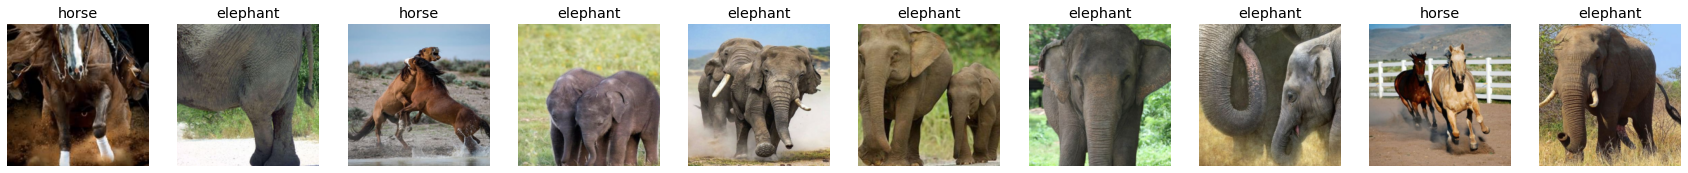

In [11]:
dls.valid.show_batch(max_n=10,nrows=1)

In [12]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)#training our model
learn.fine_tune(4)

C:\Users\lcapitanio\AppData\Roaming\Python\Python39\site-packages\fastai\vision\learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
C:\Users\lcapitanio\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\lcapitanio\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


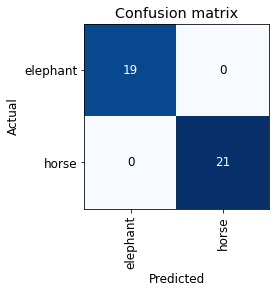

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()#plots a confusion matrix

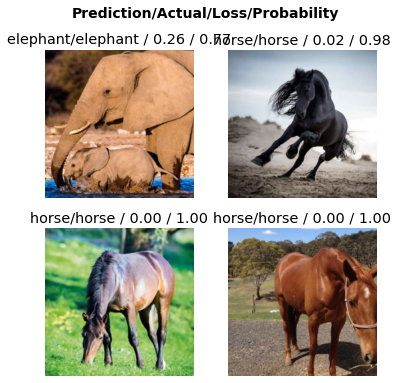

In [14]:
interp.plot_top_losses(4, nrows=2)

Salviamo il modello addestrato!

In [15]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

learn_inf = load_learner(path/'export.pkl')

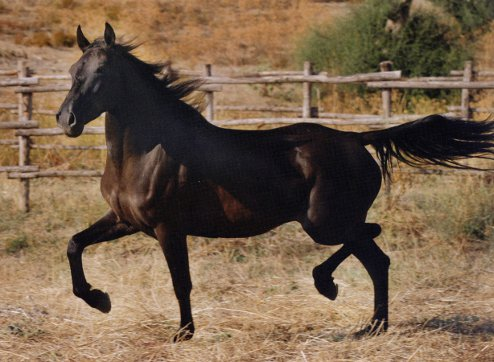

In [16]:

imgCavallo = PILImage.create('cavallo.jpg')
imgCavallo

In [18]:
pred,pred_idx,probs = learn_inf.predict(imgCavallo)#asks the model to predict the animal in the image!
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'#displays the output in a readable format
lbl_pred

Label(value='Prediction: horse; Probability: 0.9935')

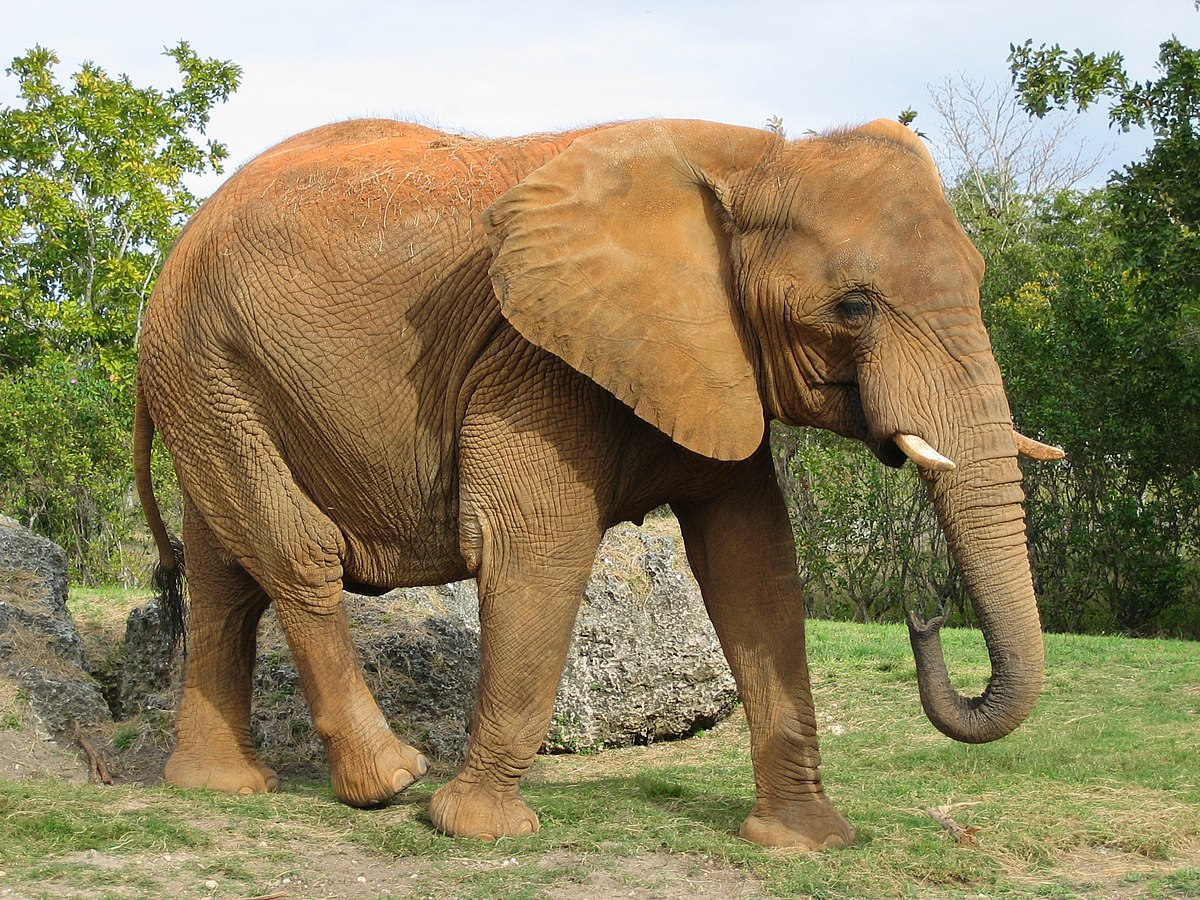

In [19]:

imgElefante = PILImage.create('elefante.jpg')
imgElefante

In [20]:
pred,pred_idx,probs = learn_inf.predict(imgElefante)#asks the model to predict the animal in the image!
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'#displays the output in a readable format
lbl_pred

Label(value='Prediction: elephant; Probability: 1.0000')